In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
plt.rcParams["figure.dpi"]=1000
plt.rcParams["figure.figsize"]=(8, 5.5)

In [2]:
states = pd.read_csv("C:/Users/user/Downloads/states_all.csv")
states_1=states.copy()
baslik_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 11}
eksen_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 11}


In [3]:
states_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) sutunlarında boşluklar olduğunu görmekteyiz. Önce bunları ortalama değerler ile doldurmamız gerekir.

In [4]:
columns=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']

In [5]:
for i in columns:
    for j in states_1.YEAR.unique():
        states_1[i]=states_1[i].fillna(states_1.groupby(states_1['YEAR']==j)[i].transform('mean'))

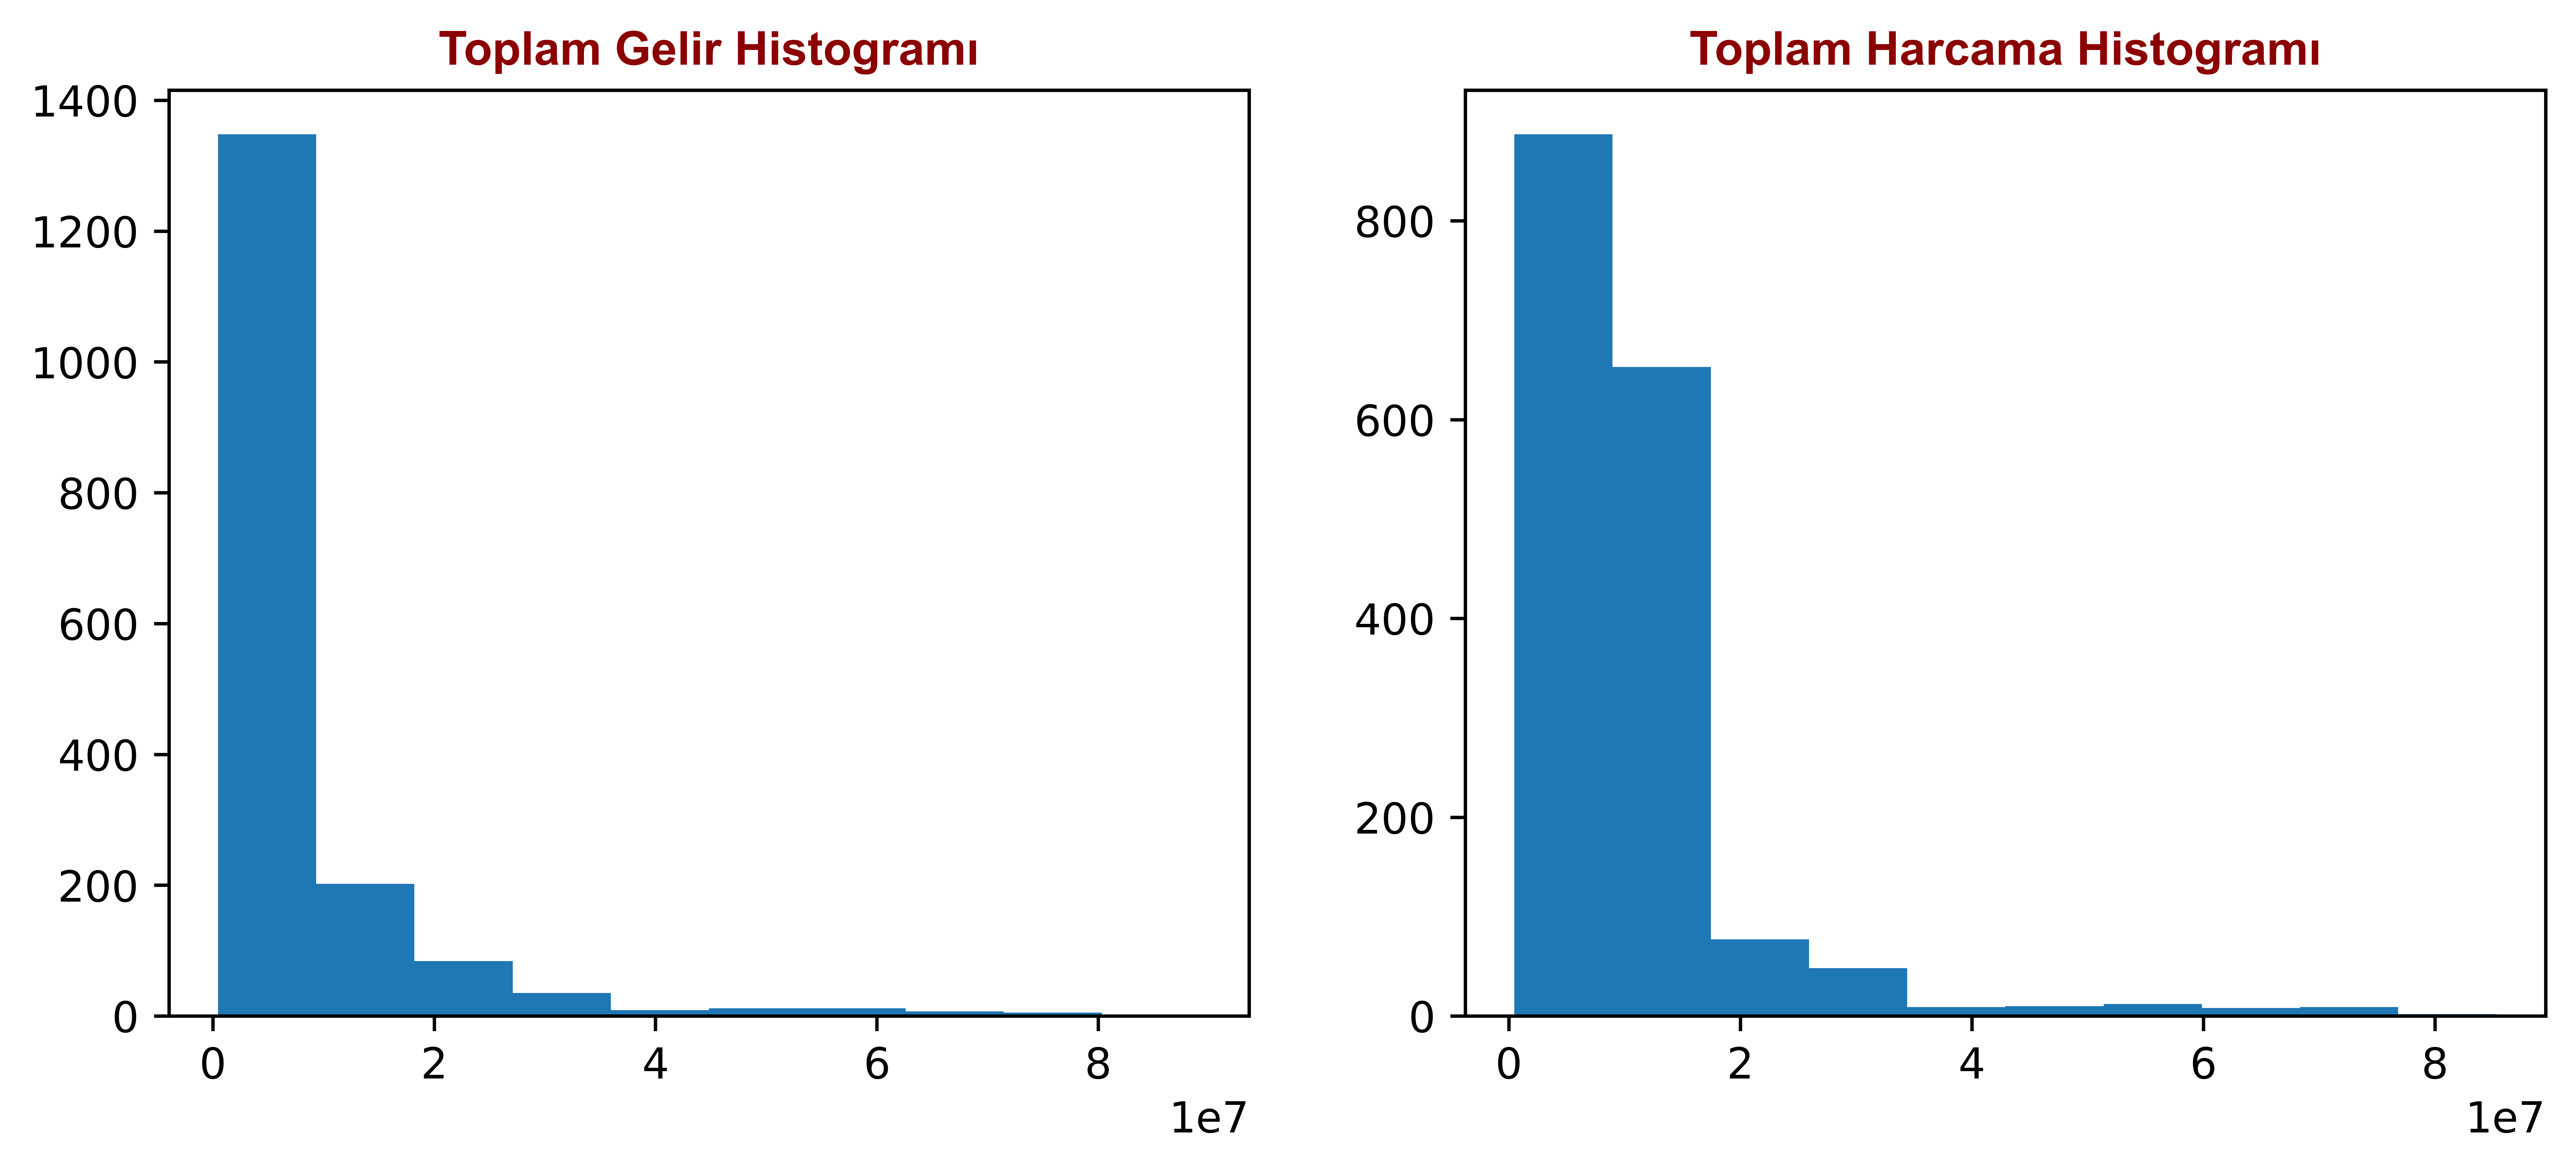

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(states_1["TOTAL_REVENUE"])
plt.title("Toplam Gelir Histogramı", fontdict=baslik_font)

plt.subplot(1, 2, 2)
plt.hist(states_1["TOTAL_EXPENDITURE"])
plt.title("Toplam Harcama Histogramı", fontdict=baslik_font)
plt.show()

Yukarıdaki histogram ve kutu grafikleri incelendiğinde aykırı değerlerin olduğu görülmektedir.

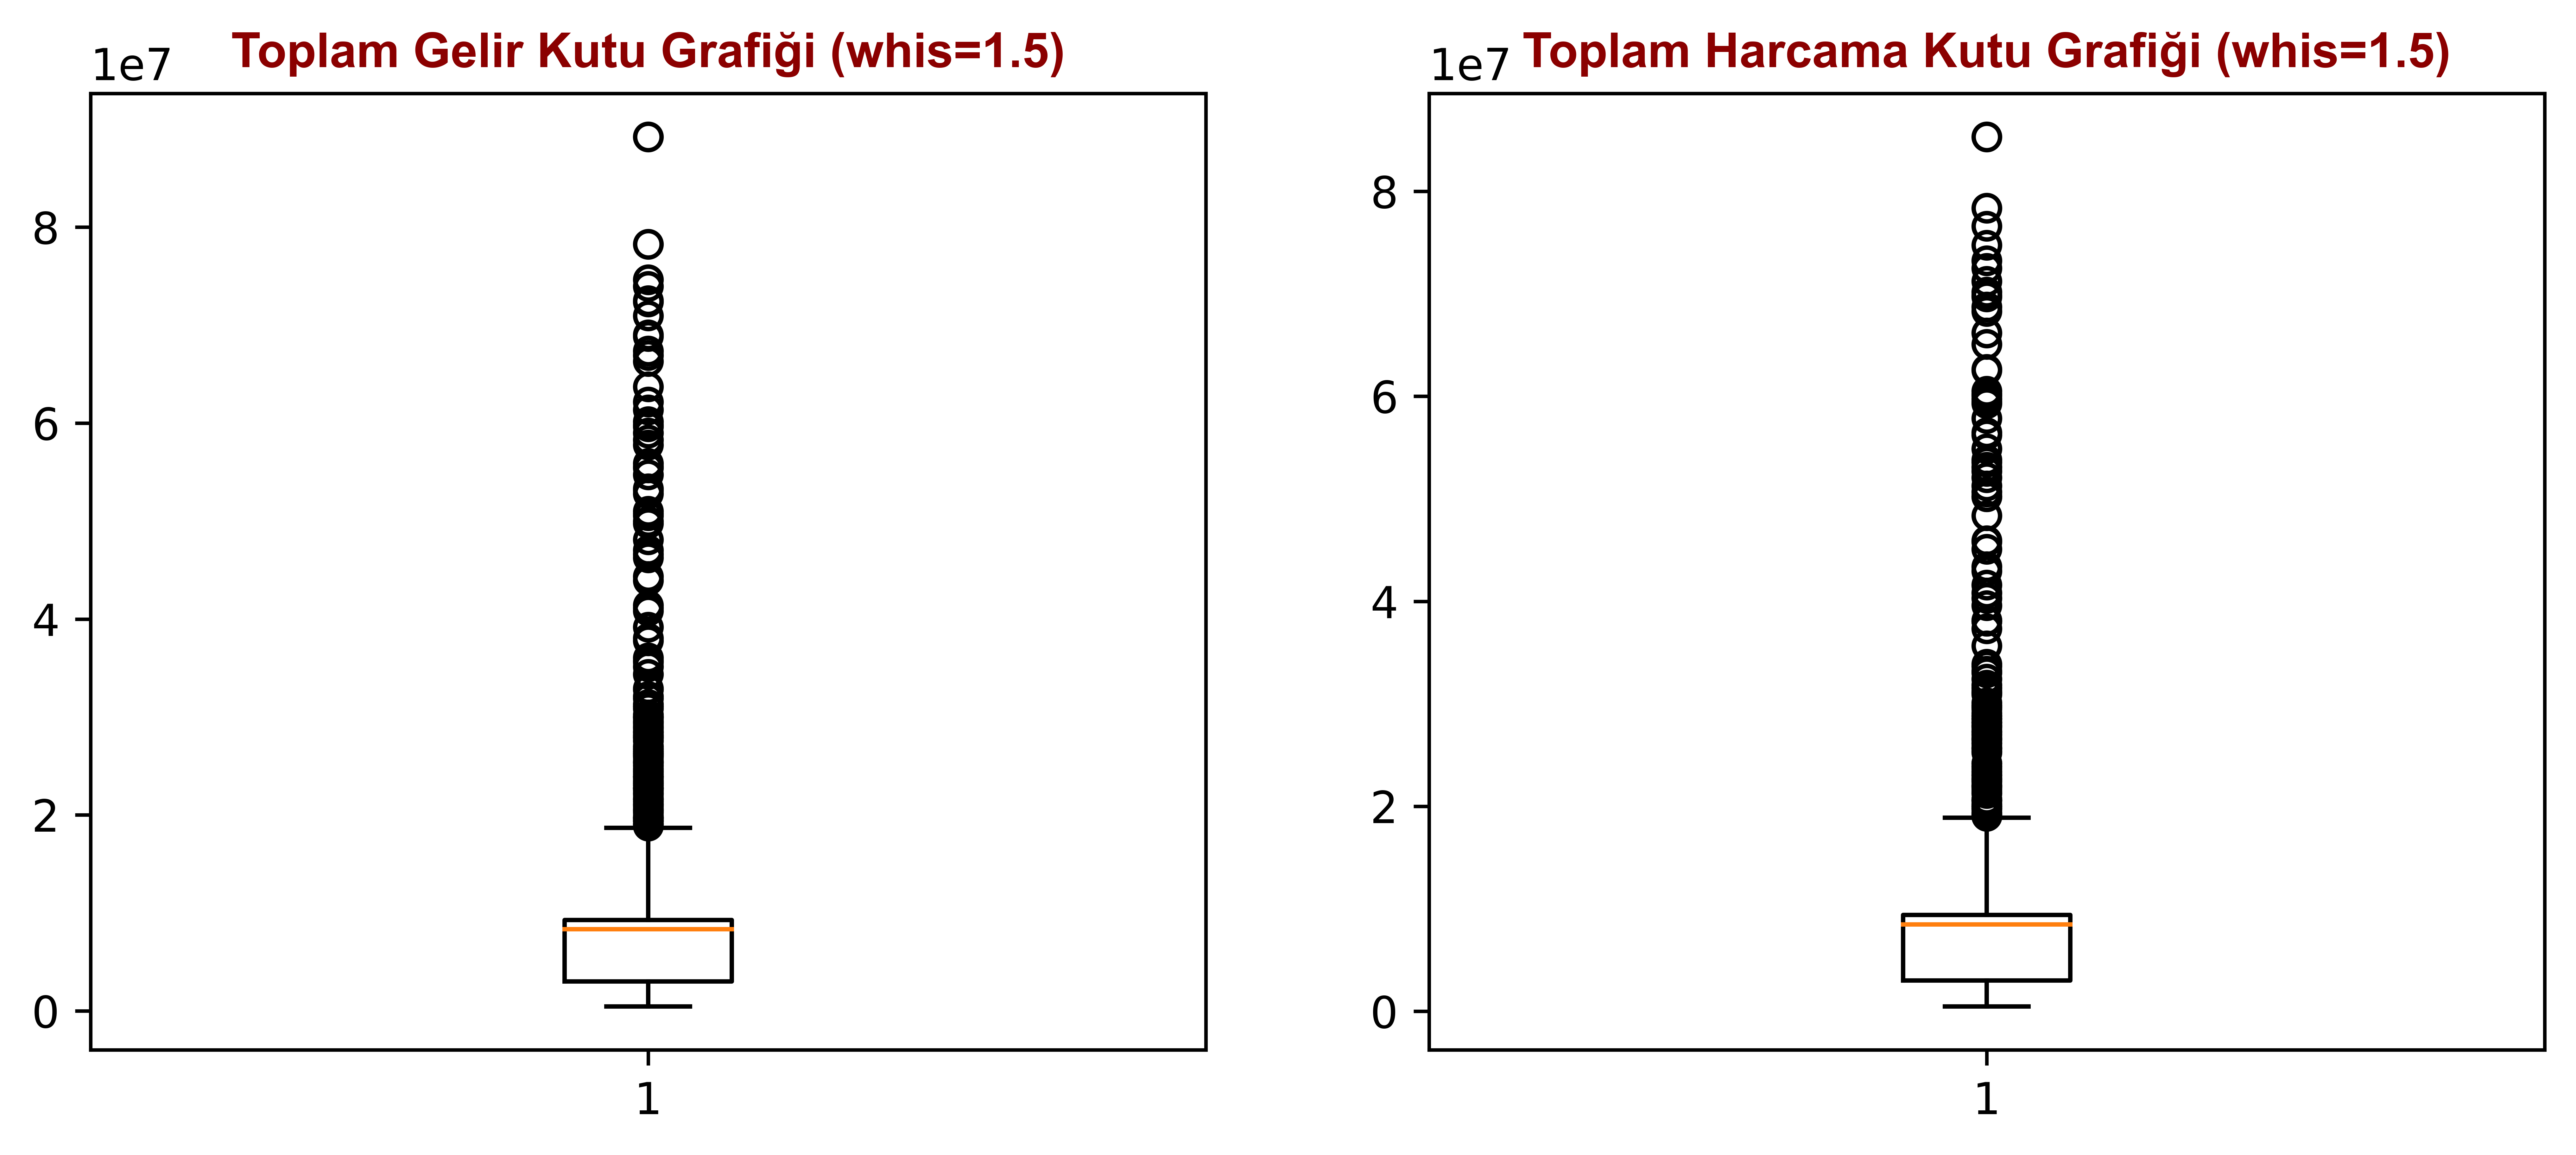

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.boxplot(states_1["TOTAL_REVENUE"])
plt.title("Toplam Gelir Kutu Grafiği (whis=1.5)", fontdict=baslik_font)

plt.subplot(1, 2, 2)
plt.boxplot(states_1["TOTAL_EXPENDITURE"])
plt.title("Toplam Harcama Kutu Grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

Yukarıdaki histogram ve kutu grafikleri incelendiğinde aykırı değerlerin olduğu görülmektedir. Şimdi bu aykırı değerleri ortadan kaldırmaya çalışalım.

In [8]:
winsorize_TOTAL_REVENUE = winsorize(states_1["TOTAL_REVENUE"], (0, 0.05))
winsorize_TOTAL_EXPENDITURE = winsorize(states_1["TOTAL_EXPENDITURE"], (0, 0.05))

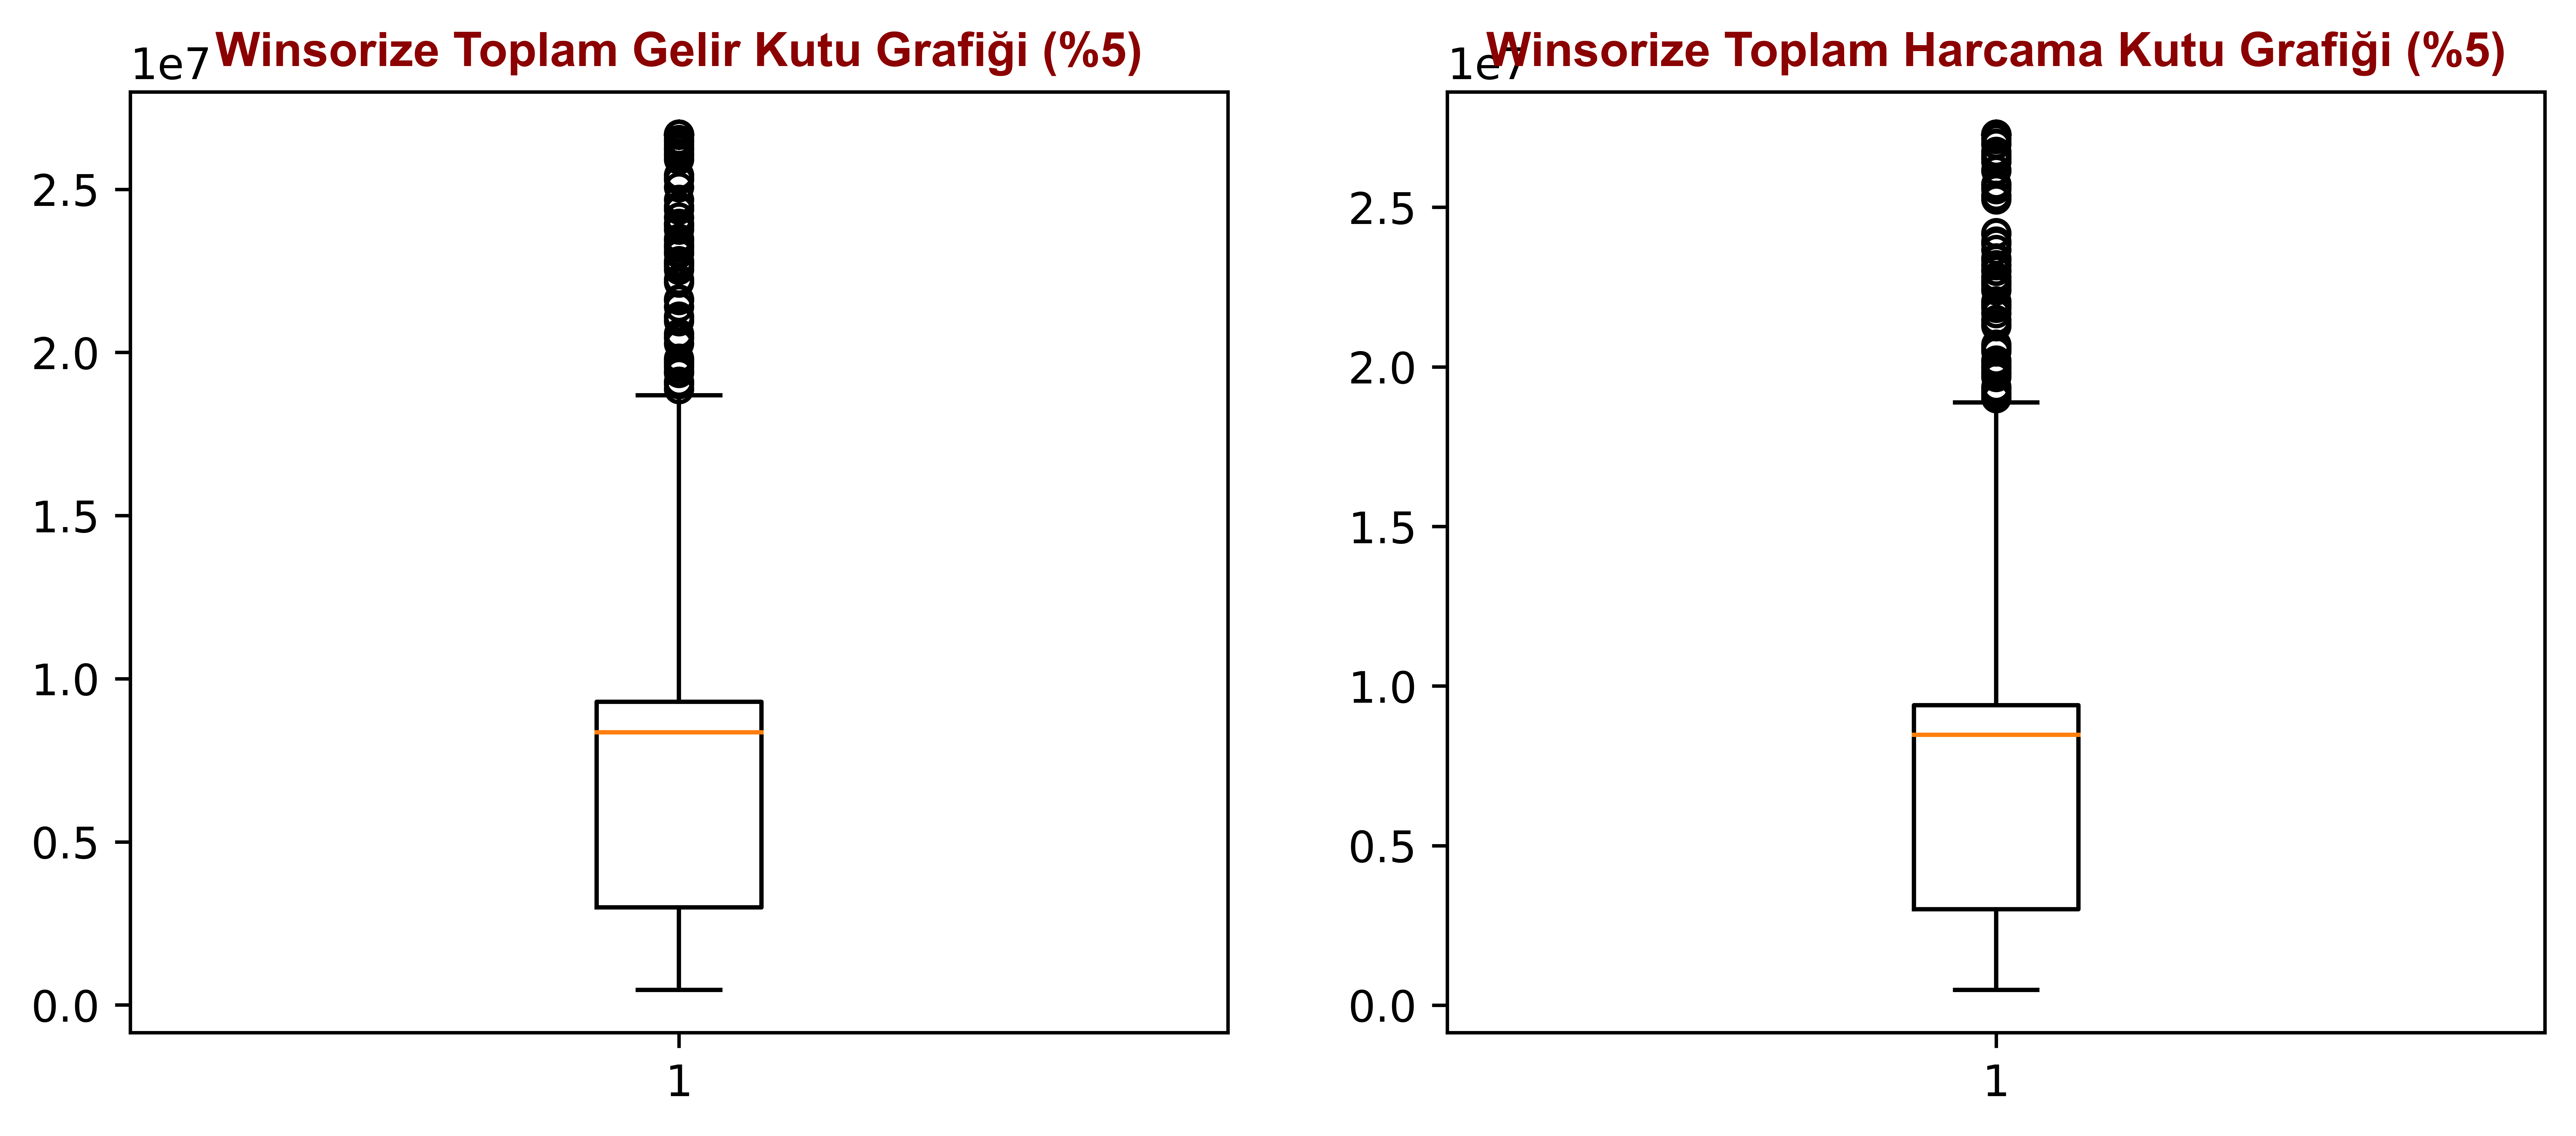

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.boxplot(winsorize_TOTAL_REVENUE)
plt.title("Winsorize Toplam Gelir Kutu Grafiği (%5)", fontdict=baslik_font)

plt.subplot(1, 2, 2)
plt.boxplot(winsorize_TOTAL_EXPENDITURE)
plt.title("Winsorize Toplam Harcama Kutu Grafiği (%5)", fontdict=baslik_font)
plt.show()

Görüldüğü gibi %5 lik sınırlandırma yetmedi, hala aykırı değerler mevcut. Sınırlandırmayı %10 yapalım.

In [10]:
winsorize_TOTAL_REVENUE1 = winsorize(states_1["TOTAL_REVENUE"], (0, 0.1))
winsorize_TOTAL_EXPENDITURE1 = winsorize(states_1["TOTAL_EXPENDITURE"], (0, 0.1))

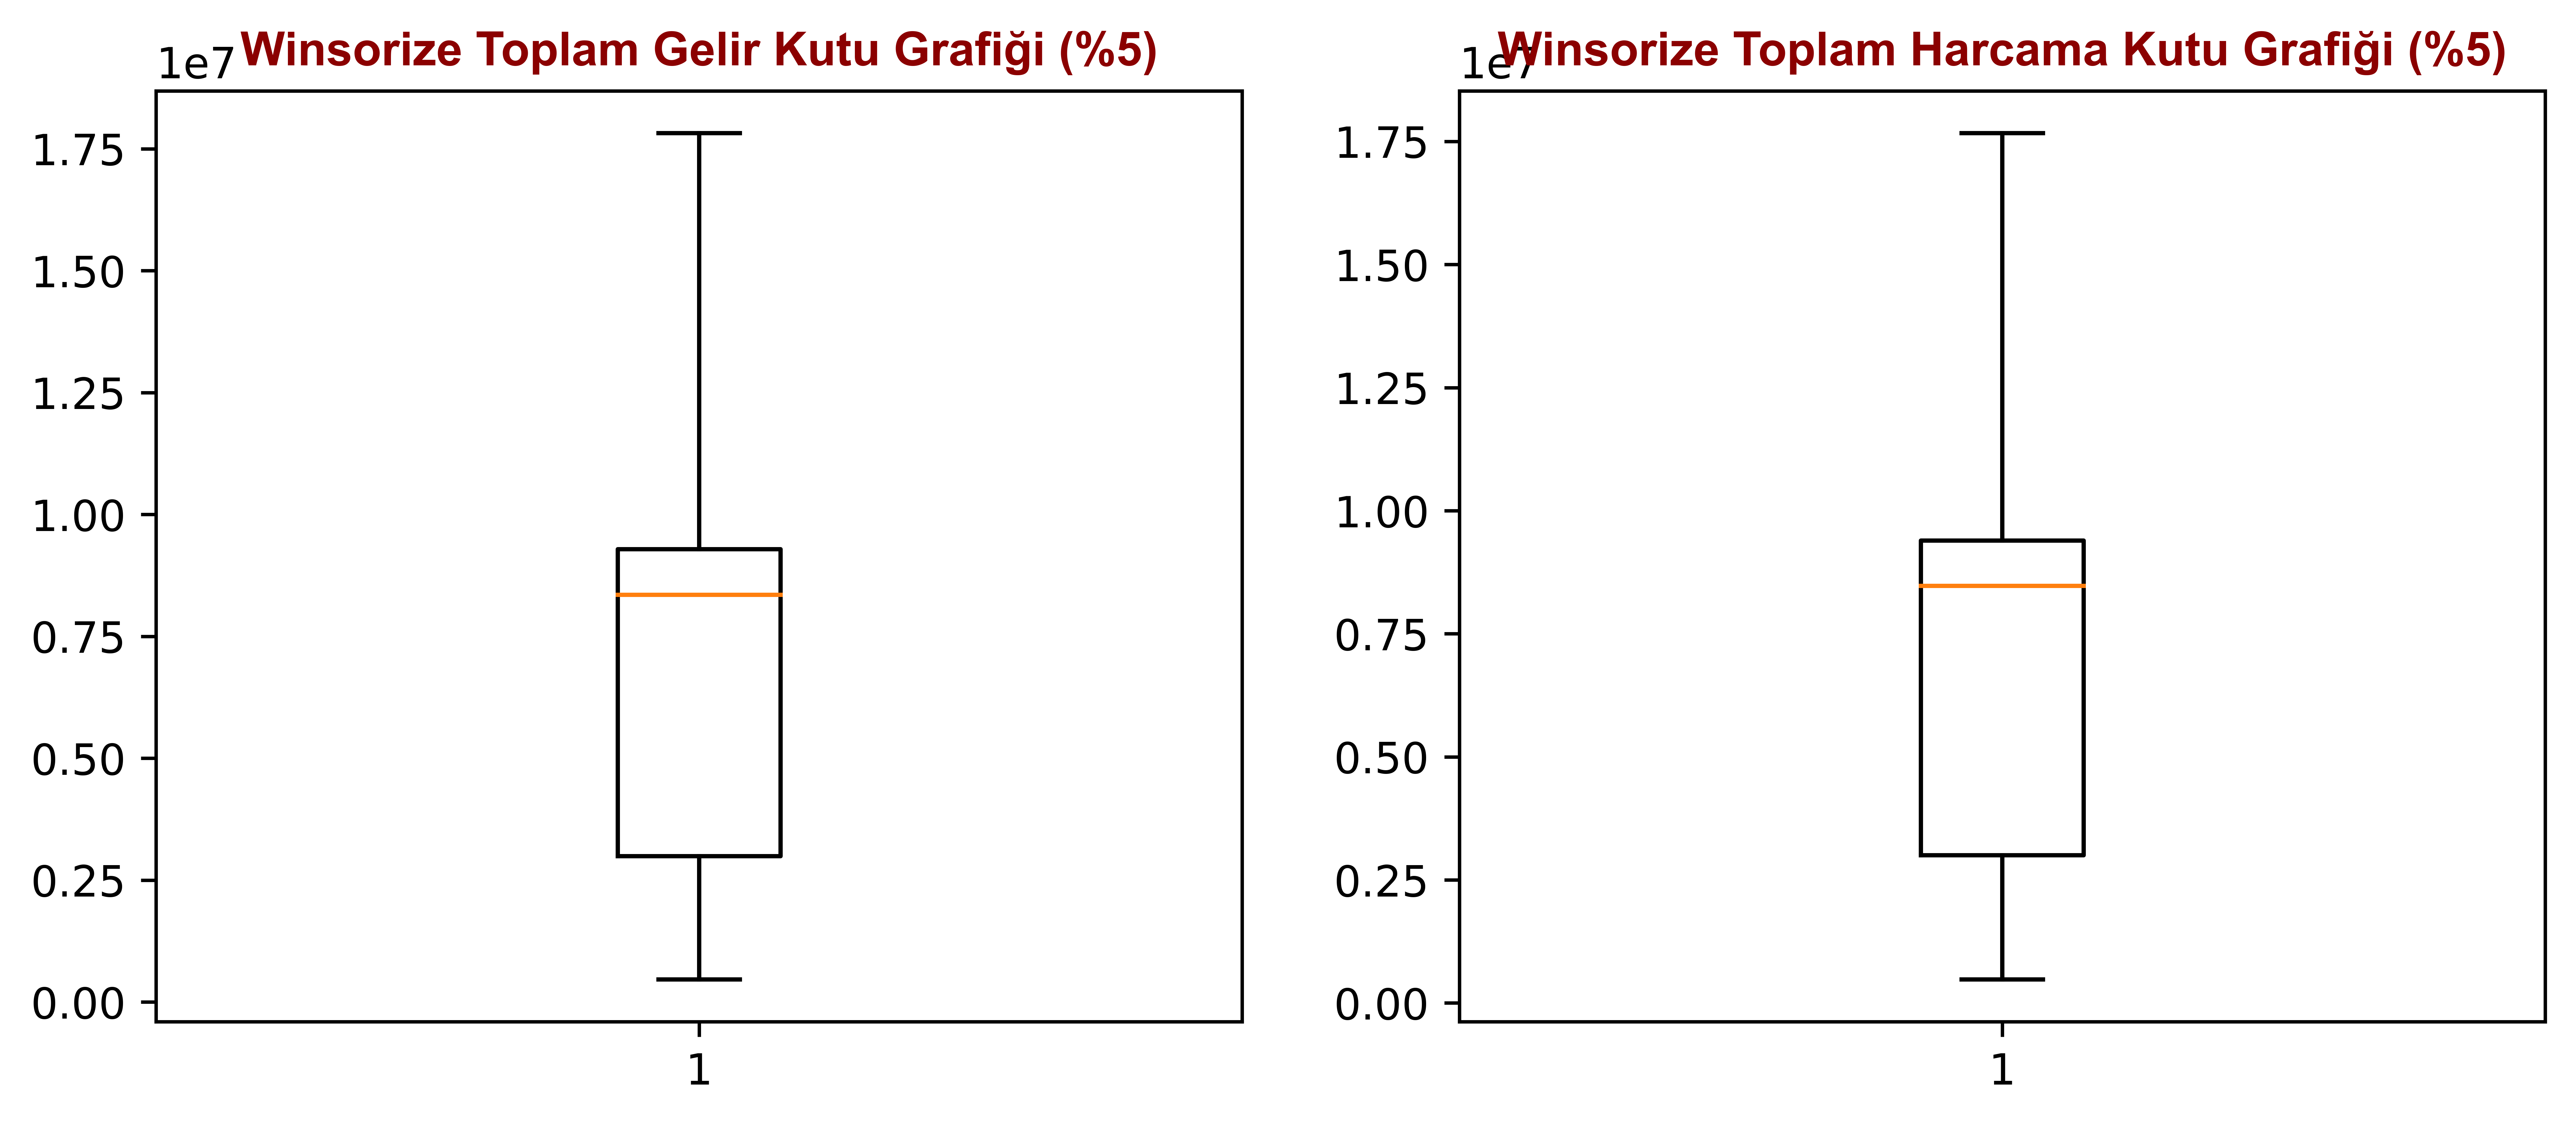

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.boxplot(winsorize_TOTAL_REVENUE1)
plt.title("Winsorize Toplam Gelir Kutu Grafiği (%5)", fontdict=baslik_font)

plt.subplot(1, 2, 2)
plt.boxplot(winsorize_TOTAL_EXPENDITURE1)
plt.title("Winsorize Toplam Harcama Kutu Grafiği (%5)", fontdict=baslik_font)
plt.show()

Şuanda aykırı değer görülmüyor. Aynı işlemi log dönüşümü ile yapalım.

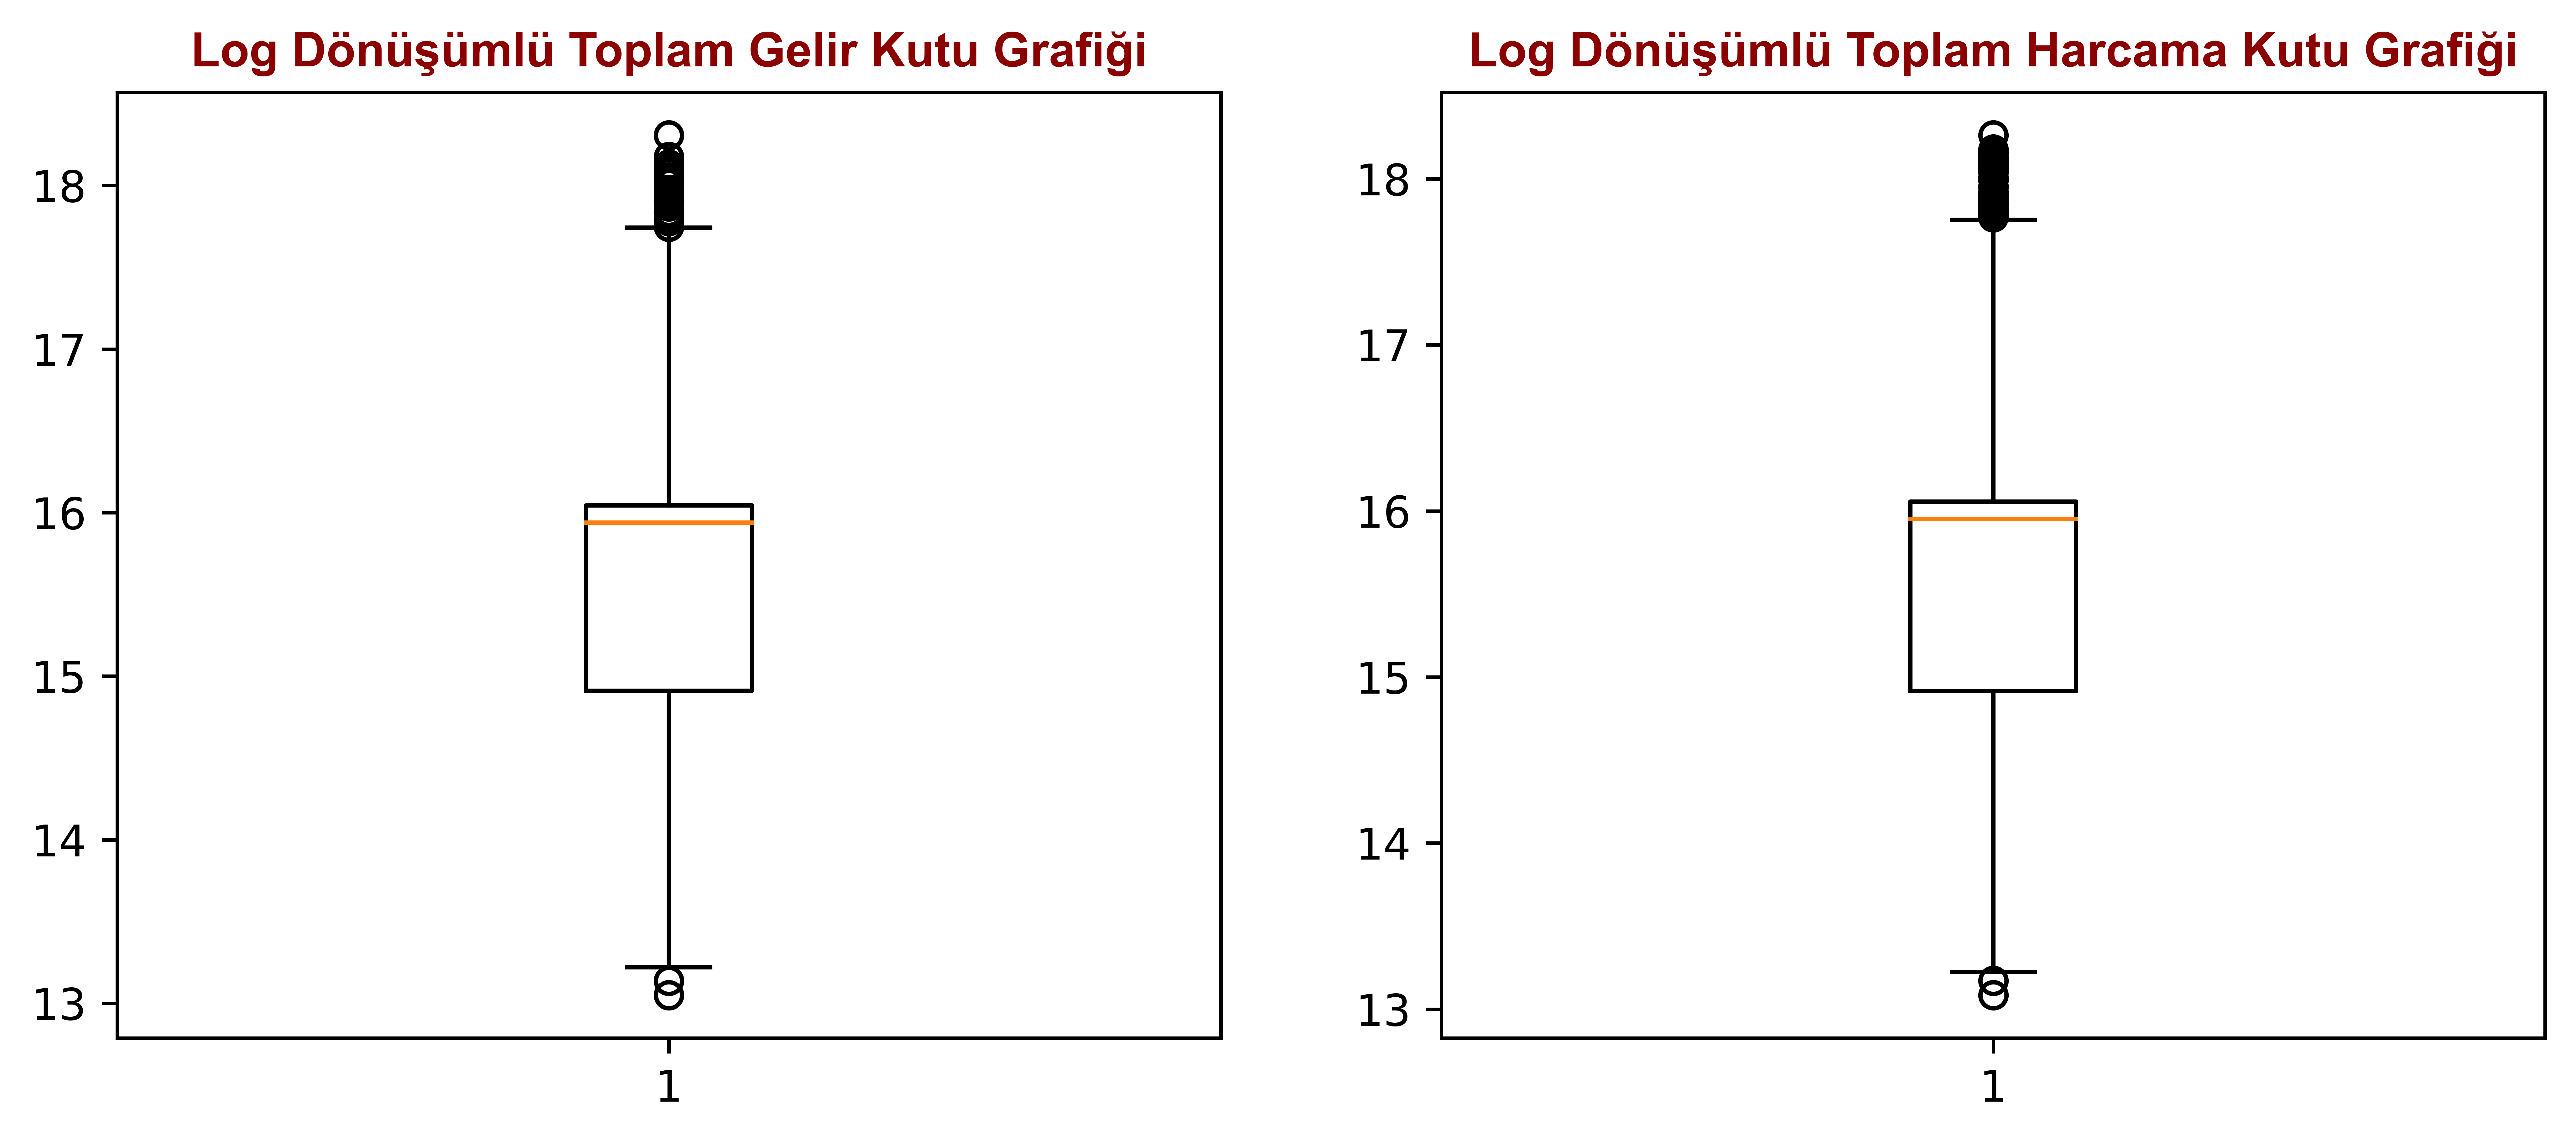

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.boxplot(np.log(states_1["TOTAL_REVENUE"]))
plt.title("Log Dönüşümlü Toplam Gelir Kutu Grafiği", fontdict=baslik_font)

plt.subplot(1, 2, 2)
plt.boxplot(np.log(states_1["TOTAL_EXPENDITURE"]))
plt.title("Log Dönüşümlü Toplam Harcama Kutu Grafiği", fontdict=baslik_font)
plt.show()

Şuanda az miktarda aykırı değer görülmekte. Şimdide Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturalım (aykırı değerleri temezlemeden). Sonrada bu yeni değişkende de aykırı değerler olup olmadığına bakalım.

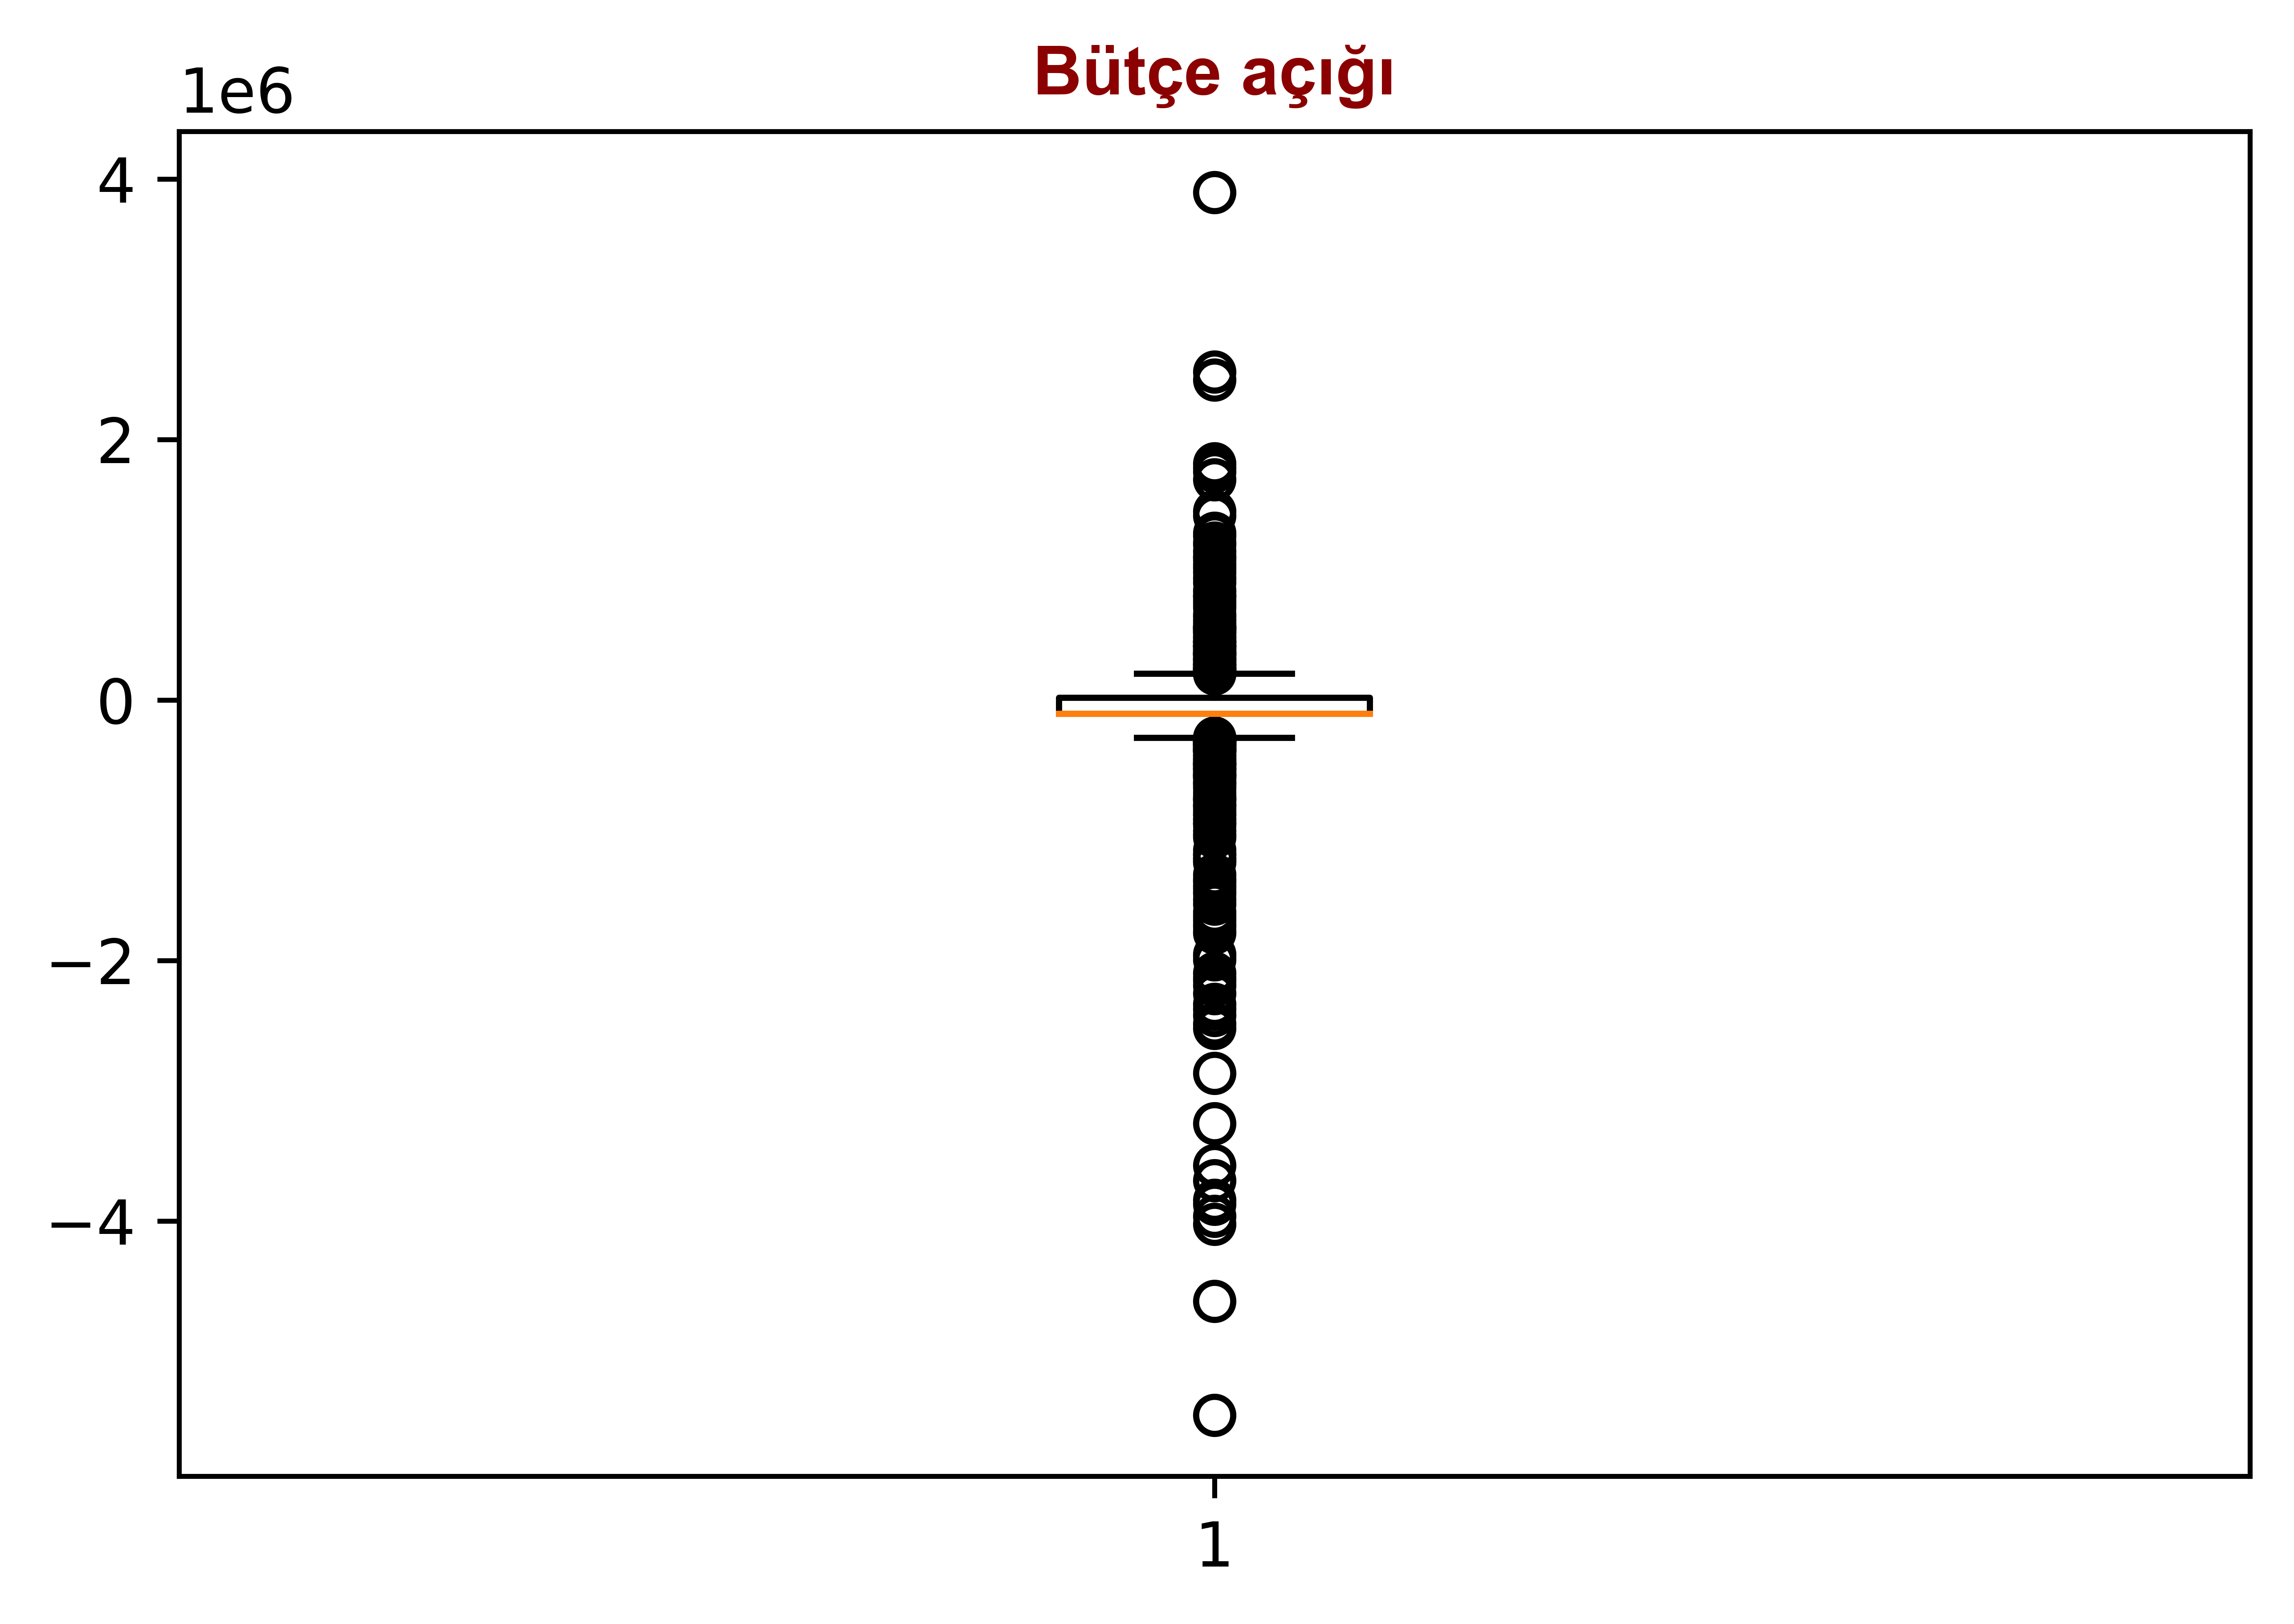

In [12]:
plt.figure(figsize=(6,4))
states_1["butce_acigi"]=states_1["TOTAL_REVENUE"] - states_1["TOTAL_EXPENDITURE"] 
plt.boxplot(states_1["butce_acigi"])
plt.title("Bütçe açığı", fontdict=baslik_font)
plt.show()

Bu yeni değişkende de aykırı değerler mevcuttur. Bu aykırı değerleri iki taraflı winsörize ile temizlemeye çalışalım.

Text(0.5, 1.0, 'Winsorize Bütçe Açığı Kutu Grafiği (%10)')

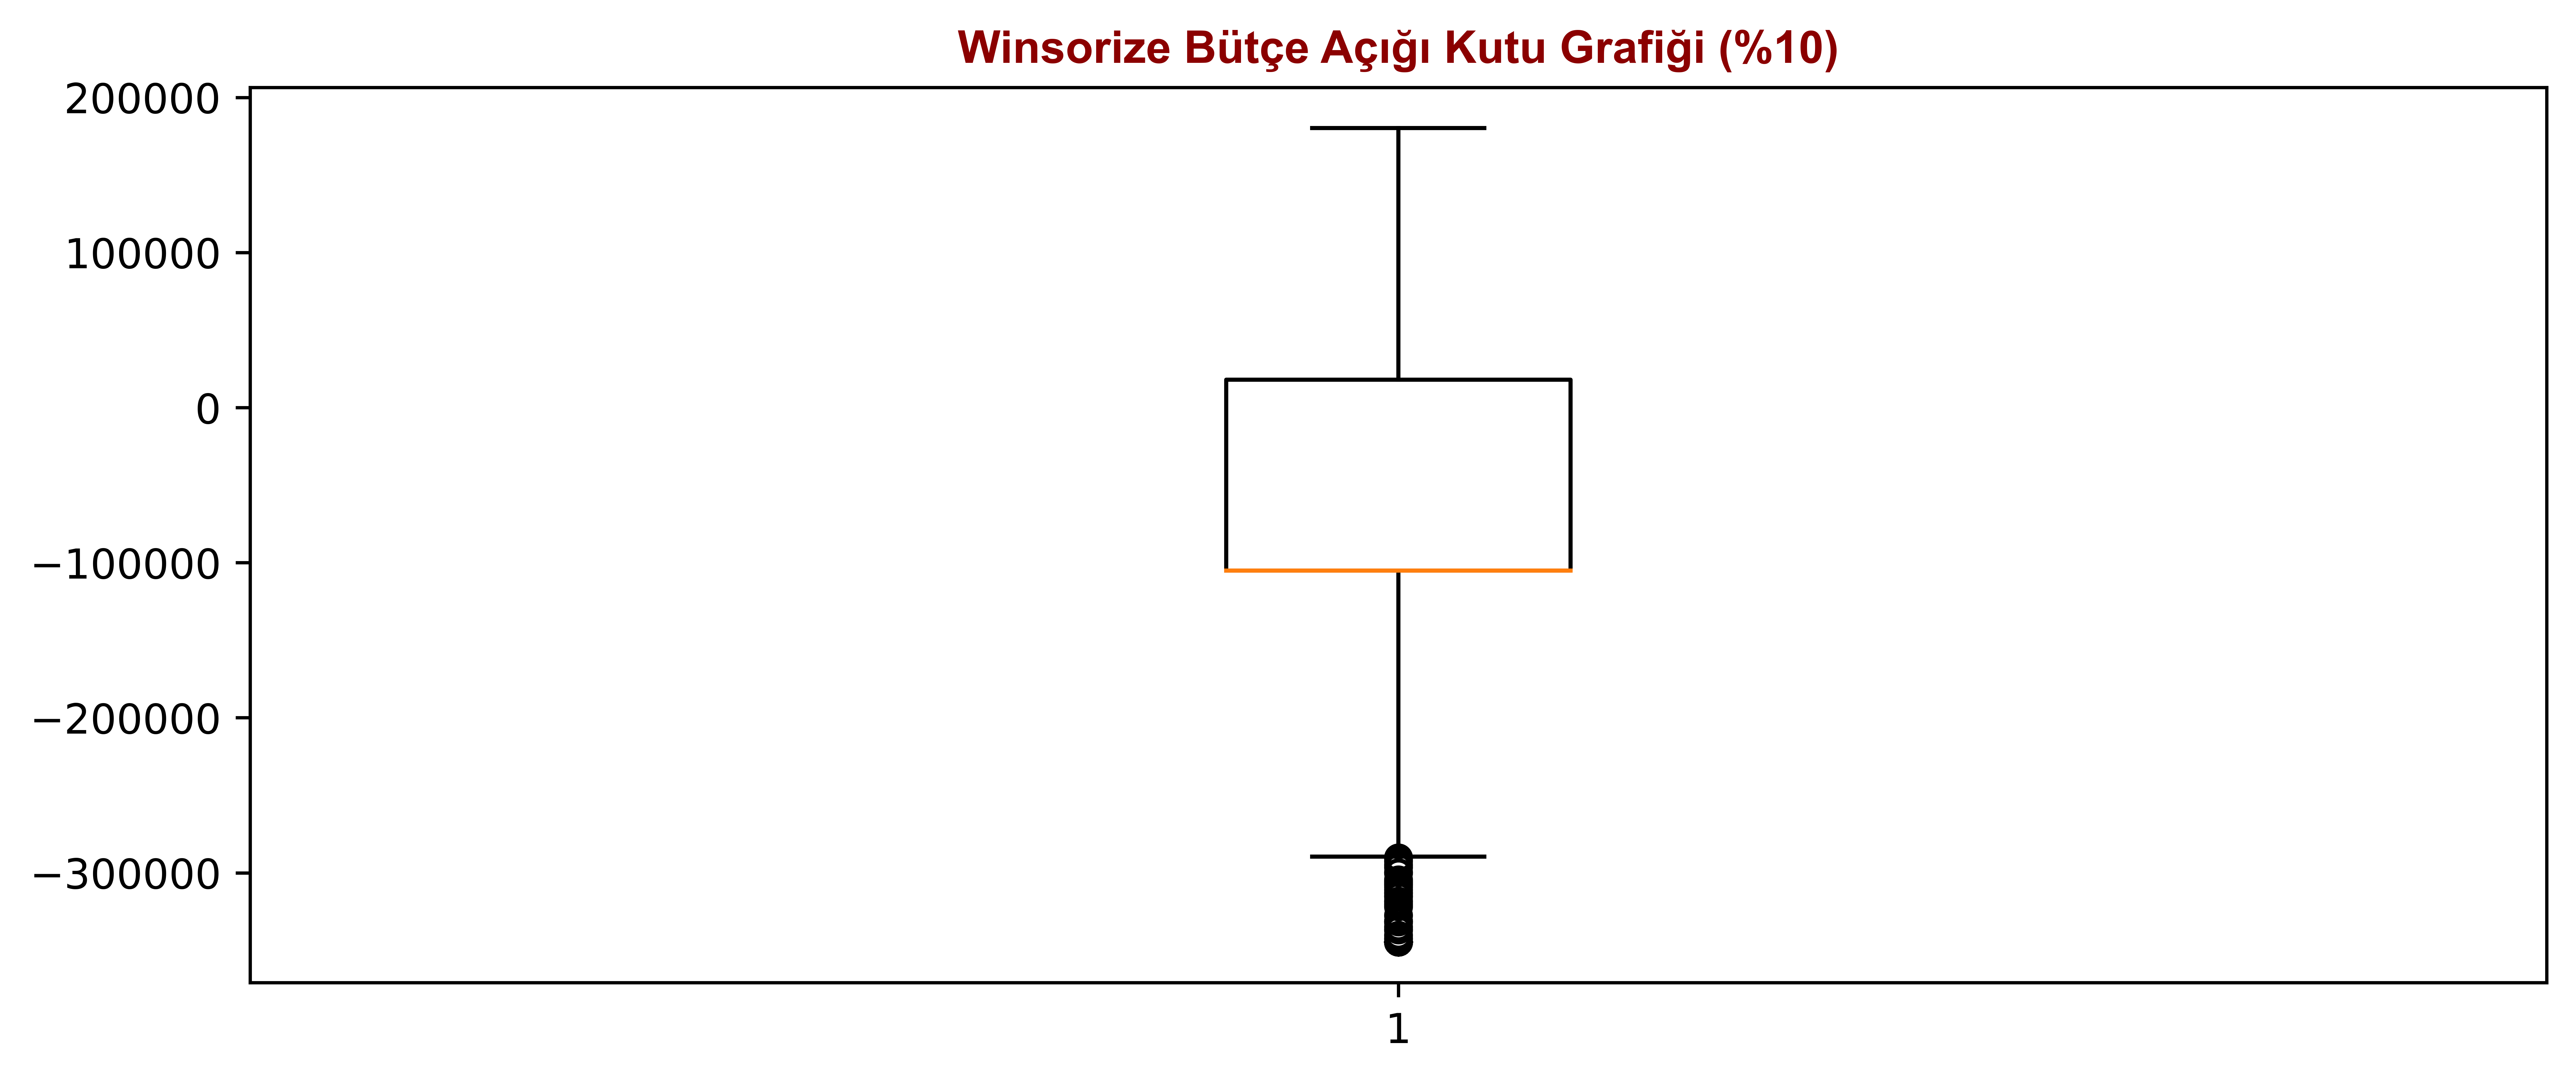

In [14]:
winsorize_butce_acigi = winsorize(states_1["butce_acigi"], (0.1, 0.1))
plt.figure(figsize=(10,4))
plt.boxplot(winsorize_butce_acigi )
plt.title("Winsorize Bütçe Açığı Kutu Grafiği (%10)", fontdict=baslik_font)


Şimdide aykırı değerleri temizlenmiş; toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturalım. Bu yeni değişkende de aykırı değerler var mı bakalım.

Text(0.5, 1.0, 'Winsorize Bütçe Açığı Kutu Grafiği ')

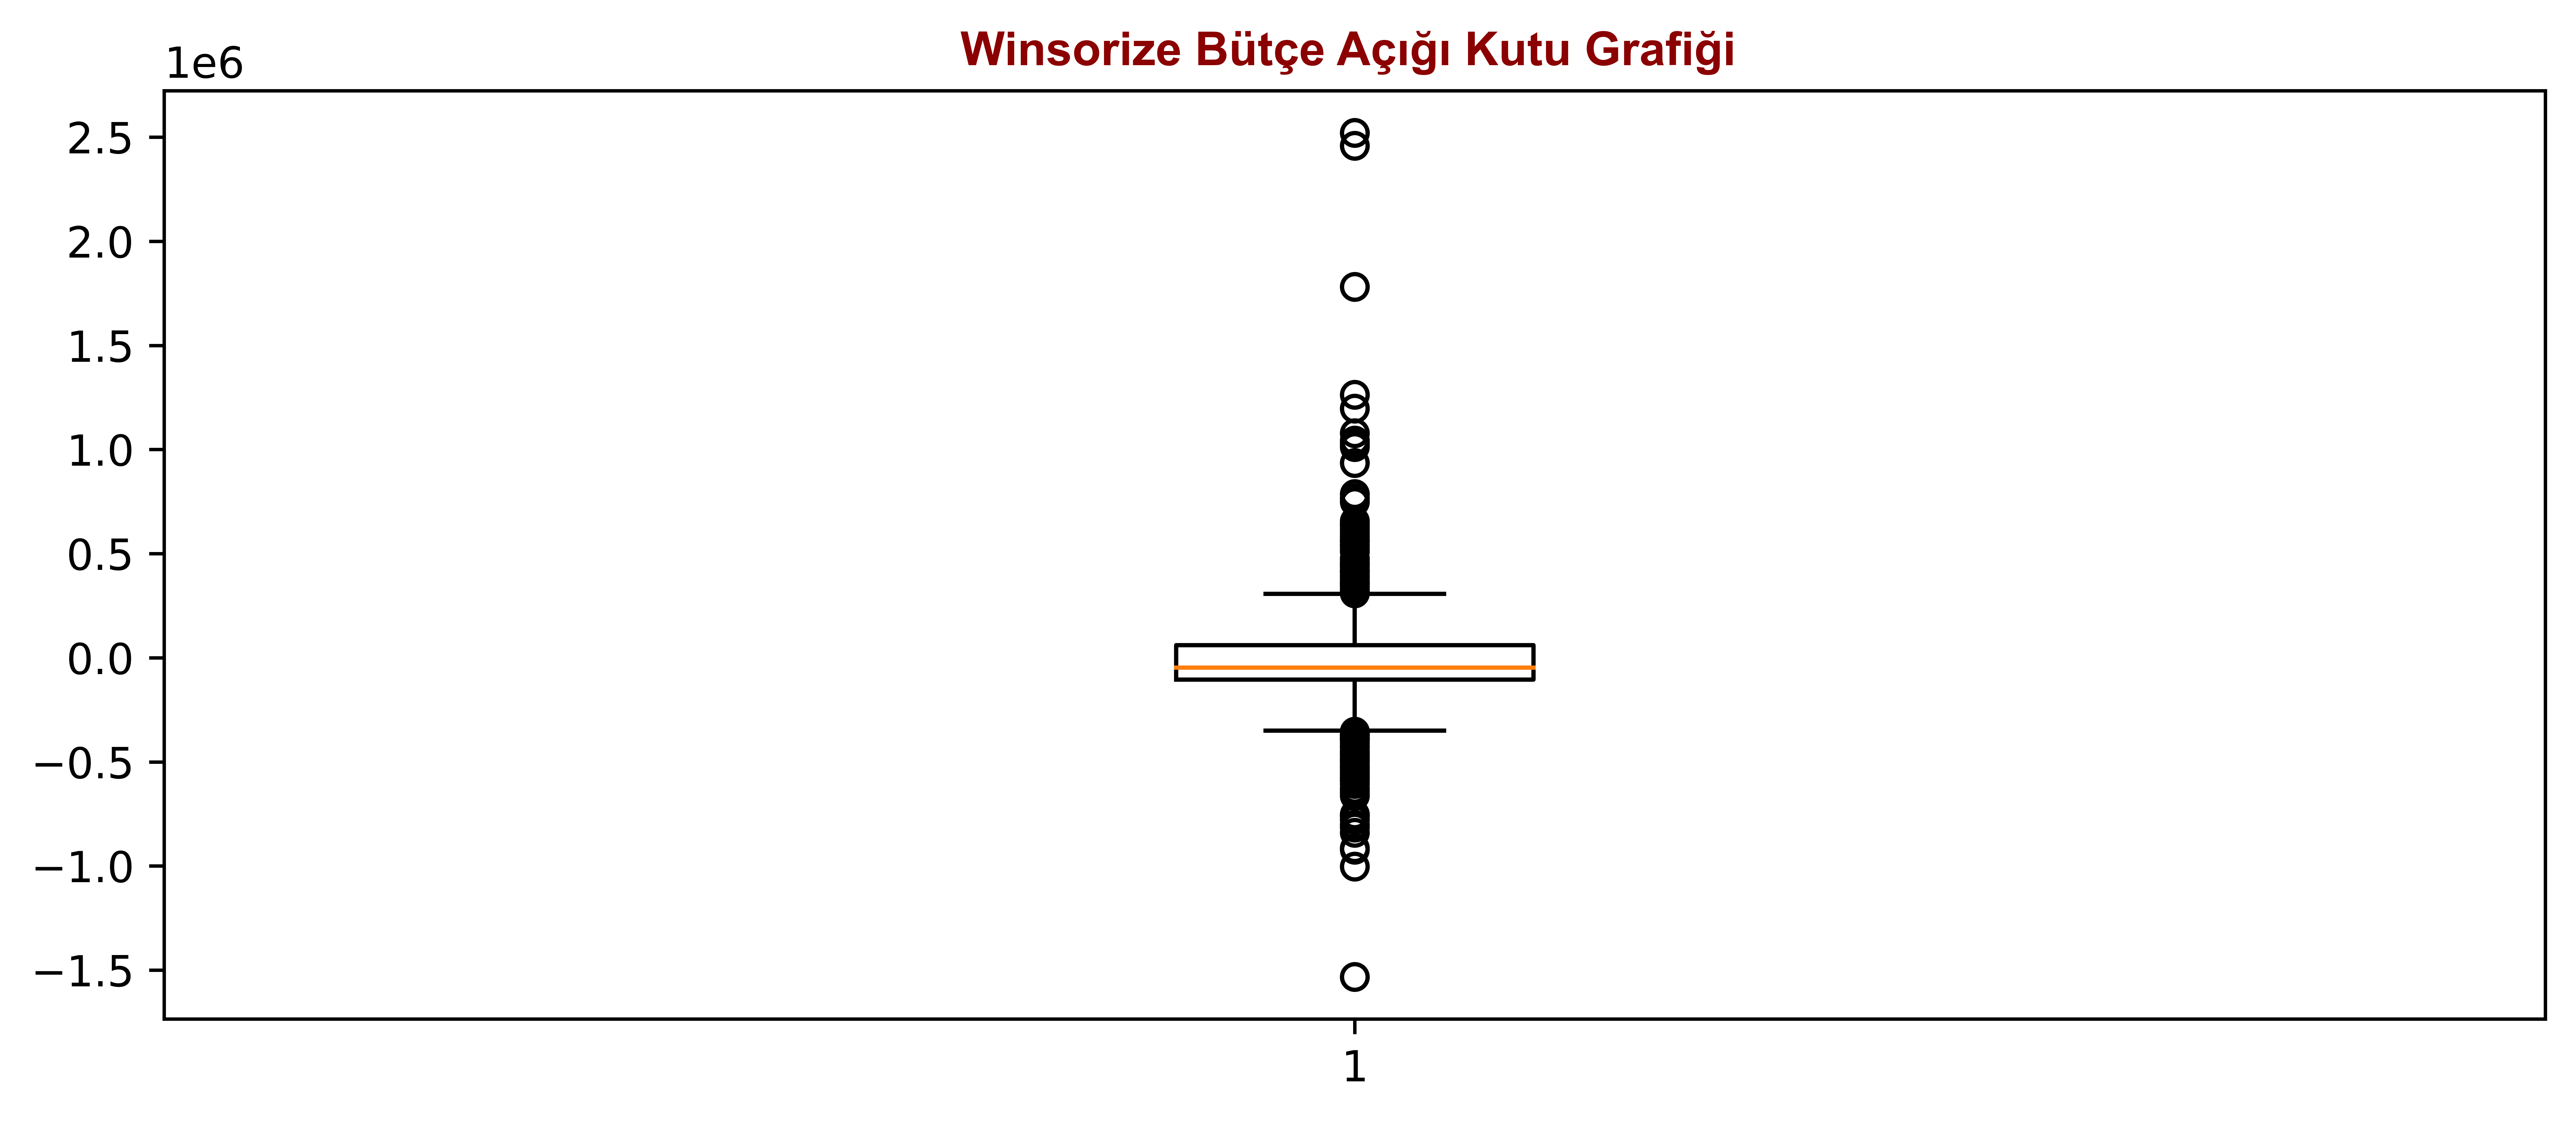

In [15]:
states_1["winsorize_butce_acigi_temizlenmis"]=winsorize_TOTAL_REVENUE1 - winsorize_TOTAL_EXPENDITURE1
plt.figure(figsize=(10,4))
plt.boxplot(states_1["winsorize_butce_acigi_temizlenmis"])
plt.title("Winsorize Bütçe Açığı Kutu Grafiği ", fontdict=baslik_font)

Bu yeni değişkende de aykırı değerler var. Bunları da temizleyelim.

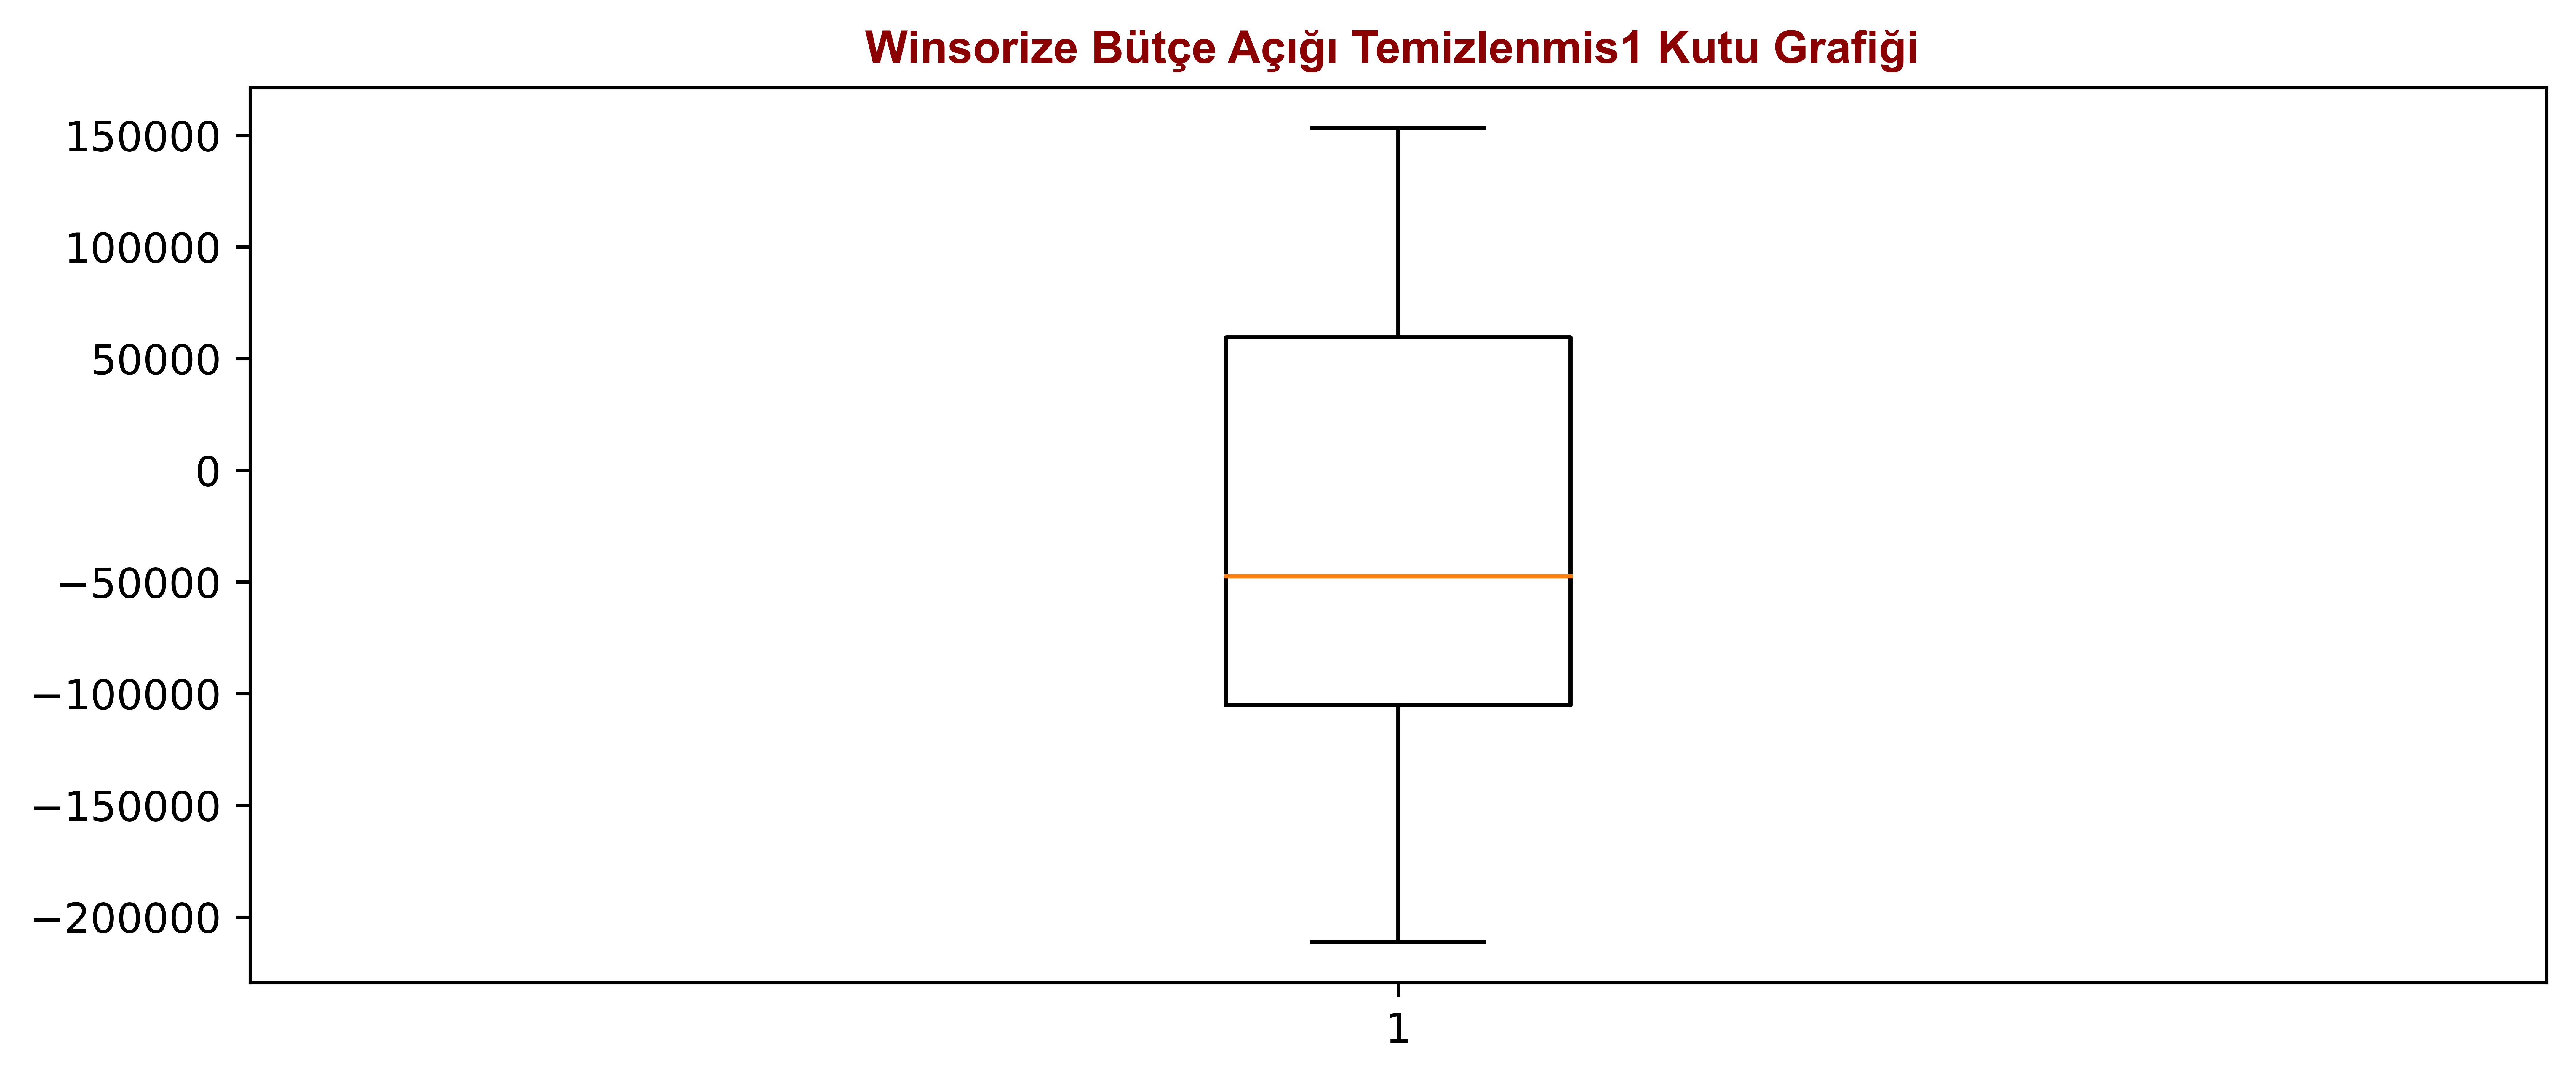

In [16]:
winsorize_butce_acigi_temizlenmis1 = winsorize(states_1["winsorize_butce_acigi_temizlenmis"],
                                               (0.1, 0.1))

plt.figure(figsize=(10,4))
plt.boxplot(winsorize_butce_acigi_temizlenmis1)
plt.title("Winsorize Bütçe Açığı Temizlenmis1 Kutu Grafiği ", fontdict=baslik_font)
plt.show()

Elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark mevcut. Dördüncü soruda aşırı değerler merkeze daha yakın. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için üçüncü soruda uguladığımız yöntem bence daha iyi olurdu. Çünkü iki kere aşırı verileri temizleme ihtiyacı yok.